# **Predicting Restaurant Food Cost**
By Darshik A S

___

## **Introduction**

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. In this notebook, we'll be predicting the cost of the food served by the restaurants across different cities and ivestigate the factors that really affect the cost. 

## **Data Overview**

The following are the features of the dataset:

   - **TITLE** : The feature of the restaurant which can help identify what and for whom it is suitable for.
   - **RESTAURANT_ID** : A unique ID for each restaurant.
   - **CUISINES** : The variety of cuisines that the restaurant offers.
   - **TIME** : The open hours of the restaurant.
   - **CITY** : The city in which the restaurant is located.
   - **LOCALITY** : The locality of the restaurant.
   - **RATING** : The average rating of the restaurant by customers.
   - **VOTES** : The overall votes received by the restaurant.
   - **COST** : The average cost of a two-person meal.
   
Size of training set : **12,690** records

Size of test set : **4,231** records

## **Data Preparation**

In [167]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Load train and test dataset
train_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Data_Test.xlsx')

In [169]:
# Displaying samples of train dataset
train_data.sample(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4010,QUICK BITES,13748,Fast Food,7am – 1am (Mon-Sun),Hyderabad,Kondapur,3.6,29 votes,300
11005,FOOD COURT,1297,"North Indian, Charcoal Chicken, Kebab",3pm – 11pm (Mon-Sun),Hyderabad,Tolichowki,3.4,78 votes,600
1239,SWEET SHOP,11973,Mithai,Not Available,Kochi,Mattancherry,4.3,62 votes,150
809,CASUAL DINING,15050,"Seafood, Biryani, North Indian, Chinese",11:30am – 11:30pm (Mon-Sun),Secunderabad,Uppal,3.0,421 votes,650
12606,CASUAL DINING,1527,North Indian,11am – 11:30pm (Mon-Sun),Bangalore,Indiranagar,4.1,775 votes,950


In [170]:
# Displaying samples of test dataset
test_data.sample(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
3390,CASUAL DINING,6132,"South Indian, North Indian, Street Food",7am – 10:30pm (Mon-Sun),Chennai,Nungambakkam,3.8,124 votes
3912,CASUAL DINING,14364,"South Indian, Biryani, Chinese","11am – 12midnight (Mon),11am – 11pm (Tue-Sun)",Hyderabad,Suraram,3.5,122 votes
3064,QUICK BITES,8301,"Kerala, South Indian, Chinese",11am – 11pm (Mon-Sun),Kochi,Kaloor,3.2,40 votes
2664,QUICK BITES,2780,"Fast Food, Beverages",8pm – 10pm (Mon-Sun),Bangalore,HSR Layout,3.4,6 votes
1986,CASUAL DINING,15016,"North Indian, South Indian",12noon – 11pm (Mon-Sun),Hyderabad,Kompally,3.5,323 votes


In [171]:
# Check for null values present in the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


* Except the *RESTAURANT_ID* and the target variable *COST*, other features are of object type
* There are null values present in the *CITY*, *LOCALITY*, *RATING* and *VOTES* features.

In [172]:
# Check for null values present in the test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


* Except the *RESTAURANT_ID*, other features are of object type
* There are null values present in the *CITY*, *LOCALITY*, *RATING* and *VOTES* features.

### ***Let's check the proportion of null values present in the dataset***

In [173]:
# Train dataset
data_length = len(train_data)
print('Percentage of null values in CITY : {:,.2f}%'.format(train_data.CITY.isnull().sum() * 100 / data_length))
print('Percentage of null values in LOCALITY : {:,.2f}%'.format(train_data.LOCALITY.isnull().sum() * 100 / data_length))
print('Percentage of null values in RATING : {:,.2f}%'.format(train_data.RATING.isnull().sum() * 100 / data_length))
print('Percentage of null values in VOTES : {:,.2f}%'.format(train_data.VOTES.isnull().sum() * 100 / data_length))

Percentage of null values in CITY : 0.88%
Percentage of null values in LOCALITY : 0.77%
Percentage of null values in RATING : 0.02%
Percentage of null values in VOTES : 9.49%


In [174]:
# Test Dataset
data_length = len(test_data)
print('Percentage of null values in CITY : {:,.2f}%'.format(test_data.CITY.isnull().sum() * 100 / data_length))
print('Percentage of null values in LOCALITY : {:,.2f}%'.format(test_data.LOCALITY.isnull().sum() * 100 / data_length))
print('Percentage of null values in RATING : {:,.2f}%'.format(test_data.RATING.isnull().sum() * 100 / data_length))
print('Percentage of null values in VOTES : {:,.2f}%'.format(test_data.VOTES.isnull().sum() * 100 / data_length))

Percentage of null values in CITY : 0.83%
Percentage of null values in LOCALITY : 0.71%
Percentage of null values in RATING : 0.05%
Percentage of null values in VOTES : 9.50%


* It seems the presence of null values are approximately similar in both training and test dataset
* Let's check if theres any null values after removing duplicates

In [175]:
# Check number of duplicates present in the train and test data
print(train_data.duplicated(subset=['RESTAURANT_ID','CITY','TITLE','CUISINES','LOCALITY']).sum())
print(test_data.duplicated(subset=['RESTAURANT_ID','CITY','TITLE','CUISINES','LOCALITY']).sum())

26
1


In [176]:
# Removing dupliates from the dataset
train_data.drop_duplicates(subset=['RESTAURANT_ID','CITY','TITLE','CUISINES','LOCALITY'],keep='first',inplace=True)
test_data.drop_duplicates(subset=['RESTAURANT_ID','CITY','TITLE','CUISINES','LOCALITY'],keep='first',inplace=True)

In [177]:
# Removing the non significant feature RESTAURANT_ID, 
train_data.drop(columns=['RESTAURANT_ID'],inplace=True)
test_data.drop(columns=['RESTAURANT_ID'],inplace=True)

In [178]:
# Reset the idices after removing rows
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

### ***Now extract features (Unique Titles) from the TITLE column, and encode it***

In [179]:
import re

In [180]:
# Encoding the features from the TITLE column of the train data
train_title = train_data.TITLE.agg(lambda x: pd.Series(1,str(x).strip().lower().replace(' ','').split(','))).fillna(0)
train_title.columns = ['title_'+i for i in train_title.columns]
train_title.reset_index(drop=True,inplace=True)
train_title.sample(5)

,title_casualdining,title_bar,title_quickbites,title_dessertparlor,title_café,title_microbrewery,title_beverageshop,title_iranicafe,title_bakery,title_none,...,title_foodcourt,title_foodtruck,title_mess,title_kiosk,title_club,title_confectionery,title_dhaba,title_meatshop,title_cocktailbar,title_paanshop
7969,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7843,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7821,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8212,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
# Encoding the features from the TITLE column of the test data
test_title = test_data.TITLE.agg(lambda x: pd.Series(1,str(x).strip().lower().replace(' ','').split(','))).fillna(0)
test_title.columns = ['title_'+i for i in test_title.columns]
test_title.reset_index(drop=True,inplace=True)
test_title.sample(5)

,title_casualdining,title_quickbites,title_none,title_foodtruck,title_dessertparlor,title_bar,title_lounge,title_beverageshop,title_pub,title_café,...,title_foodcourt,title_kiosk,title_mess,title_microbrewery,title_club,title_cocktailbar,title_meatshop,title_confectionery,title_paanshop,title_bhojanalya
1020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1803,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* The number of columns in both train and test seems to be not matching.

In [182]:
train_title.columns.sort_values()

Index(['title_bakery', 'title_bar', 'title_beverageshop', 'title_café',
       'title_casualdining', 'title_club', 'title_cocktailbar',
       'title_confectionery', 'title_dessertparlor', 'title_dhaba',
       'title_finedining', 'title_foodcourt', 'title_foodtruck',
       'title_iranicafe', 'title_kiosk', 'title_lounge', 'title_meatshop',
       'title_mess', 'title_microbrewery', 'title_none', 'title_paanshop',
       'title_pub', 'title_quickbites', 'title_sweetshop'],
      dtype='object')

In [183]:
test_title.columns.sort_values()

Index(['title_bakery', 'title_bar', 'title_beverageshop', 'title_bhojanalya',
       'title_café', 'title_casualdining', 'title_club', 'title_cocktailbar',
       'title_confectionery', 'title_dessertparlor', 'title_dhaba',
       'title_finedining', 'title_foodcourt', 'title_foodtruck',
       'title_iranicafe', 'title_kiosk', 'title_lounge', 'title_meatshop',
       'title_mess', 'title_microbrewery', 'title_none', 'title_paanshop',
       'title_pub', 'title_quickbites', 'title_sweetshop'],
      dtype='object')

* There is an extra feature in the test dataset. Lets combine it with the title_none feature

In [184]:
# Combining title_bojanalya with title_none
test_title.loc[:,'title_none'] = ((test_title.title_bhojanalya == 1) | (test_title.title_none == 1)).astype(int)

In [185]:
# Drop the title_bojanalya
test_title.drop(columns=['title_bhojanalya'],inplace=True)

### ***Now extract features (Unique Cuisines) from the CUISINES column, and encode it***

In [186]:
# Encoding the features from the TITLE column of the train data
train_cuisines = train_data.CUISINES.agg(lambda x: pd.Series(1,set(str(x).strip().lower().replace(' ','').split(','))) ).fillna(0)
train_cuisines.columns = ['cuisines_'+i for i in train_cuisines.columns]
train_cuisines.reset_index(drop=True,inplace=True)
train_cuisines.sample(5)

,cuisines_malwani,cuisines_goan,cuisines_northindian,cuisines_japanese,cuisines_asian,cuisines_modernindian,cuisines_biryani,cuisines_hyderabadi,cuisines_chinese,cuisines_tibetan,...,cuisines_pakistani,cuisines_peruvian,cuisines_cuisinevaries,cuisines_irish,cuisines_multicuisine,cuisines_vegan,cuisines_jewish,cuisines_oriental,cuisines_modernaustralian,cuisines_egyptian
5860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9043,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
# Encoding the features from the TITLE column of the test data
test_cuisines = test_data.CUISINES.agg(lambda x: pd.Series(1,set(str(x).strip().lower().replace(' ','').split(','))) ).fillna(0)
test_cuisines.columns = ['cuisines_'+i for i in test_cuisines.columns]
test_cuisines.reset_index(drop=True,inplace=True)
test_cuisines.sample(5)

,cuisines_kebab,cuisines_northindian,cuisines_mughlai,cuisines_chinese,cuisines_southindian,cuisines_pizza,cuisines_fastfood,cuisines_biryani,cuisines_seafood,cuisines_kerala,...,cuisines_singaporean,cuisines_cantonese,cuisines_hawaiian,cuisines_paan,cuisines_cuisinevaries,cuisines_naga,cuisines_kashmiri,cuisines_oriental,cuisines_vegan,cuisines_sindhi
2683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2886,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1507,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3891,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Number of cuisine features extracted for train and test dataset are not matching

In [188]:
# Macthing the number of features in both train and test dataset
tr_set = set(train_cuisines.columns.sort_values())
ts_set = set(test_cuisines.columns.sort_values())
for i in ts_set.difference(tr_set.intersection(ts_set)):
        train_cuisines[i] = 0
for i in tr_set.difference(tr_set.intersection(ts_set)):
        test_cuisines[i] = 0
test_cuisines = test_cuisines[train_cuisines.columns]

In [189]:
train_cuisines.sample(5)

,cuisines_malwani,cuisines_goan,cuisines_northindian,cuisines_japanese,cuisines_asian,cuisines_modernindian,cuisines_biryani,cuisines_hyderabadi,cuisines_chinese,cuisines_tibetan,...,cuisines_vegan,cuisines_jewish,cuisines_oriental,cuisines_modernaustralian,cuisines_egyptian,cuisines_mishti,cuisines_hawaiian,cuisines_brazilian,cuisines_fishandchips,cuisines_falafel
8538,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5606,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5252,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
11412,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [190]:
test_cuisines.sample(5)

,cuisines_malwani,cuisines_goan,cuisines_northindian,cuisines_japanese,cuisines_asian,cuisines_modernindian,cuisines_biryani,cuisines_hyderabadi,cuisines_chinese,cuisines_tibetan,...,cuisines_vegan,cuisines_jewish,cuisines_oriental,cuisines_modernaustralian,cuisines_egyptian,cuisines_mishti,cuisines_hawaiian,cuisines_brazilian,cuisines_fishandchips,cuisines_falafel
4129,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
674,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


### ***Extract the days on which the restaurant will be opened from the TIME feature***

In [191]:
# (Train data) Extract the days and ranges of days from the TIME feature using regex and encode it
df_time = train_data.TIME.agg(lambda x: pd.Series(1,(set(re.findall('([NA]{2}|[c][l][o][s][e][d]\s\(\w+\)|[c][l][o][s][e][d]|\(\w+?\W\w*\)|[a-z]{3})',str(x).lower().replace('noon','pm').replace('midnight','am').replace('24 hours','24').replace('not available','NA')))))).fillna(0)
df_time.reset_index(drop=True,inplace=True)
train_days_open = pd.DataFrame(np.zeros((len(df_time),8)),columns=['mon','tue','wed','thu','fri','sat','sun','NA'])
for i in list(df_time.columns):
    l = re.findall('[NA]{2}|[closed]{5}|[a-z]{3}',i)
    if len(l) > 1 and l[0] != 'close':
        train_days_open.loc[df_time[i]==1,l[0]:l[1]] = 1
    elif len(l) > 1 and l[0] == 'close':
        train_days_open.loc[df_time[i]==1,'mon'] = 1
        train_days_open.loc[df_time[i]==1,'tue'] = 1
        train_days_open.loc[df_time[i]==1,'wed'] = 1
        train_days_open.loc[df_time[i]==1,'thu'] = 1
        train_days_open.loc[df_time[i]==1,'fri'] = 1
        train_days_open.loc[df_time[i]==1,'sat'] = 1
        train_days_open.loc[df_time[i]==1,'sun'] = 1
        train_days_open.loc[df_time[i]==1,l[1]] = 0
    elif len(l) == 1 and l[0] not in ['close','NA']:
        train_days_open.loc[df_time[i]==1,l[0]] = 1
    elif len(l) == 1 and l[0] == 'NA':
        train_days_open.loc[df_time[i]==1,'NA'] = 1
        
# Also calculate the number of days the restaurant will be opened and concatenate it as an extra feature
train_days_open['total_days'] = train_days_open.drop(columns=['NA']).sum(axis=1).rename('total_days')
train_days_open.sample(5)

,mon,tue,wed,thu,fri,sat,sun,NA,total_days
1046,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0
7789,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0
12334,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0
9802,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0
2529,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0


In [192]:
# (Test data) Extract the days and ranges of days from the TIME feature using regex and encode it
df_time = test_data.TIME.agg(lambda x: pd.Series(1,(set(re.findall('([NA]{2}|[c][l][o][s][e][d]\s\(\w+\)|[c][l][o][s][e][d]|\(\w+?\W\w*\)|[a-z]{3})',str(x).lower().replace('noon','pm').replace('midnight','am').replace('24 hours','24').replace('not available','NA')))))).fillna(0)
df_time.reset_index(drop=True,inplace=True)
test_days_open = pd.DataFrame(np.zeros((len(df_time),8)),columns=['mon','tue','wed','thu','fri','sat','sun','NA'])
for i in list(df_time.columns):
    l = re.findall('[NA]{2}|[closed]{5}|[a-z]{3}',i)
    if len(l) > 1 and l[0] != 'close':
        test_days_open.loc[df_time[i]==1,l[0]:l[1]] = 1
    elif len(l) > 1 and l[0] == 'close':
        test_days_open.loc[df_time[i]==1,'mon'] = 1
        test_days_open.loc[df_time[i]==1,'tue'] = 1
        test_days_open.loc[df_time[i]==1,'wed'] = 1
        test_days_open.loc[df_time[i]==1,'thu'] = 1
        test_days_open.loc[df_time[i]==1,'fri'] = 1
        test_days_open.loc[df_time[i]==1,'sat'] = 1
        test_days_open.loc[df_time[i]==1,'sun'] = 1
        test_days_open.loc[df_time[i]==1,l[1]] = 0
    elif len(l) == 1 and l[0] not in ['close','NA']:
        test_days_open.loc[df_time[i]==1,l[0]] = 1
    elif len(l) == 1 and l[0] == 'NA':
        test_days_open.loc[df_time[i]==1,'NA'] = 1
        
# Calculate the number of days the restaurant will be opened and concatenate it as an extra feature
test_days_open['total_days'] = test_days_open.drop(columns=['NA']).sum(axis=1).rename('total_days')
test_days_open.sample(5)

,mon,tue,wed,thu,fri,sat,sun,NA,total_days
3462,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0
1925,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0
4218,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0
3366,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0
1789,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0


In [193]:
# Combine the zero number of days rows with the NA column, since those rows doesnt have any days mentioned
train_days_open.loc[(train_days_open['total_days'] == 0)&(train_days_open['NA']==0),'NA'] = 1
test_days_open.loc[(test_days_open['total_days'] == 0)&(test_days_open['NA']==0),'NA'] = 1

### ***Extract cities from the CITY feature and encode it***

In [194]:
# Fill null values in the city as unknown
train_data.loc[:,'CITY'] = train_data.CITY.fillna('Unknown')
test_data.loc[:,'CITY'] = test_data.CITY.fillna('Unknown')

In [195]:
# Find out the most ocurring cities from the CITY feature
train_data.CITY.agg(lambda x: 
                    pd.Series(1,(set(x.strip().lower().replace(' ','').split(','))))).fillna(0).sum().sort_values(ascending=False).head(25).to_frame()

,0
chennai,2175.0
bangalore,2145.0
hyderabad,1820.0
mumbai,1713.0
newdelhi,1317.0
kochi,1280.0
gurgaon,377.0
secunderabad,310.0
noida,211.0
navimumbai,165.0


In [196]:
# Most frequently occurring cities
cities = ['Bangalore','Thane','Bandra',
          'Hyderabad','Andheri','Delhi',
          'Chennai', 'Bandra','Mumbai',
          'Kochi', 'Noida', 'Gurgaon',
          'Faridabad', 'Ghaziabad','Secunderabad']

In [197]:
from fuzzywuzzy import process

In [198]:
# Match the cities with the CITY column using the fuzzywuzzy
def match_names(wrong_names,correct_names):
    names = []
    for row in wrong_names:
        x = process.extractOne(row, correct_names)
        if x[1]<60:
            names.append('Others')
        else:
            names.append(x[0])
    return names

In [199]:
# Replace the CITY with matching cities
train_data.loc[:,'CITY'] = match_names((train_data.CITY.astype(str) + ' ' + train_data.LOCALITY.astype(str)),cities)
test_data.loc[:,'CITY'] = match_names((test_data.CITY.astype(str) + ' ' + test_data.LOCALITY.astype(str)),cities)

In [200]:
# Encoding the cities from train data
train_city = train_data.CITY.agg(lambda x: pd.Series(1,(set(x.strip().lower().replace(' ','').split(','))))).fillna(0)
train_city.drop(columns=['others'],inplace=True)
train_city.reset_index(drop=True,inplace=True)
train_city.sample(5)

,thane,chennai,bandra,mumbai,bangalore,gurgaon,hyderabad,kochi,andheri,delhi,noida,secunderabad,faridabad,ghaziabad
8710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9136,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12359,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11855,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
# Encoding the cities from test data
test_city = test_data.CITY.agg(lambda x: pd.Series(1,(set(x.strip().lower().replace(' ','').split(','))))).fillna(0)
test_city.drop(columns=['others'],inplace=True)
test_city.reset_index(drop=True,inplace=True)
test_city = test_city[train_city.columns]
test_city.sample(5)

,thane,chennai,bandra,mumbai,bangalore,gurgaon,hyderabad,kochi,andheri,delhi,noida,secunderabad,faridabad,ghaziabad
2183,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ***Label encode all the unique localities***

In [202]:
# Create dictionary of encoded localities
localities = []
localities.extend(train_data.LOCALITY.agg(lambda x: ' '.join(sorted(set(re.findall('[a-z]+',str(x).lower()))))).unique())
localities.extend(test_data.LOCALITY.agg(lambda x: ' '.join(sorted(set(re.findall('[a-z]+',str(x).lower()))))).unique())
locality_dict = dict(enumerate(set(localities)))
locality_dict = dict([(i[1],i[0]) for i in locality_dict.items()])

In [203]:
# Replace the Loaclities with encoded values
train_data.loc[:,'LOCALITY'] = train_data.LOCALITY.agg(lambda x: ' '.join(sorted(set(re.findall('[a-z]+',str(x).lower()))))).replace(locality_dict)
test_data.loc[:,'LOCALITY'] = test_data.LOCALITY.agg(lambda x: ' '.join(sorted(set(re.findall('[a-z]+',str(x).lower()))))).replace(locality_dict)

In [204]:
train_data[['LOCALITY']].sample(3)

,LOCALITY
4024,485
229,1006
12082,214


In [205]:
test_data[['LOCALITY']].sample(3)

,LOCALITY
1750,1148
3871,207
3320,705


### ***Convert RATING feature as numeric values***

In [206]:
# Check the unique ratings in both test and train data
set(list(train_data.RATING.unique())+(list(test_data.RATING.unique())))

{'-',
 '2.0',
 '2.1',
 '2.2',
 '2.3',
 '2.4',
 '2.5',
 '2.6',
 '2.7',
 '2.8',
 '2.9',
 '3.0',
 '3.1',
 '3.2',
 '3.3',
 '3.4',
 '3.5',
 '3.6',
 '3.7',
 '3.8',
 '3.9',
 '4.0',
 '4.1',
 '4.2',
 '4.3',
 '4.4',
 '4.5',
 '4.6',
 '4.7',
 '4.8',
 '4.9',
 'NEW',
 nan}

In [207]:
# Extract numeric from the RATING column and change it to numeric type
train_data['RATING'].replace({'NEW':'1','-':'1'},inplace=True)
test_data['RATING'].replace({'NEW':'1','-':'1'},inplace=True)
train_data.loc[:,'RATING'] = train_data.RATING.astype(float)
test_data.loc[:,'RATING'] = test_data.RATING.astype(float)

mean_rating = dict(round(train_data.groupby('CITY')['RATING'].mean(),1))

for i in mean_rating.items():
    train_data.loc[(train_data['RATING'].isnull())&( train_data['CITY']==i[0]),'RATING'] = i[1]
for i in mean_rating.items():
    test_data.loc[(test_data['RATING'].isnull())&( test_data['CITY']==i[0]),'RATING'] = i[1]
    
train_data['RATING'] = train_data['RATING'].astype(float)
test_data['RATING'] = test_data['RATING'].astype(float)

In [208]:
train_data[['RATING']].sample(3)

,RATING
11932,4.6
4154,3.6
11601,3.6


In [209]:
test_data[['RATING']].sample(3)

,RATING
3494,4.3
4138,4.1
3505,1.0


### ***Convert VOTES into numeric type***

In [210]:
train_data.loc[:,'VOTES'] = train_data.VOTES.fillna('0 votes').agg(lambda x: str(x).lower()[:-5].strip()).astype(int)
test_data.loc[:,'VOTES'] = test_data.VOTES.fillna('0 votes').agg(lambda x: str(x).lower()[:-5].strip()).astype(int)

In [211]:
train_data[['VOTES']].sample(3)

,VOTES
5127,409
12619,306
4148,2811


In [212]:
test_data[['VOTES']].sample(3)

,VOTES
2105,44
863,101
2096,291


### ***Extract the times of the restaurant operation and convert it into part of the day and encode it***

In [213]:
from dateutil.parser import parse
from datetime import timedelta as td

# Check the in which part of the day the restaurant starts and ends 
def check_part(x,y):
    time_start = parse(x)
    time_end = parse(y)
    start = ''
    end = ''
    if time_start >= parse('9pm'):
        start = 'early_night'
    elif time_start >= parse('7pm'):
        start = 'late_evening'
    elif time_start >= parse('5pm'):
        start = 'early_evening'
    elif time_start >= parse('4pm'):
        start = 'late_afternoon'
    elif time_start >= parse('2pm'):
        start = 'afternoon'
    elif time_start >= parse('12pm'):
        start = 'early_afternoon'
    elif time_start >= parse('11am'):
        start = 'late_morning'
    elif time_start >= parse('8am'):
        start = 'morning'
    elif time_start >= parse('5am'):
        start = 'early_morning'
    elif time_start >= parse('12am'):
        start = 'late_night'
    if time_end <= parse('5am'):
        end = 'late_night'
    elif time_end <= parse('8am'):
        end = 'early_morning'
    elif time_end <= parse('11am'):
        end = 'morning'
    elif time_end <= parse('12am'):
        end = 'late_morning'
    elif time_end <= parse('2pm'):
        end = 'early_afternoon'
    elif time_end <= parse('4pm'):
        end = 'afternoon'
    elif time_end <= parse('5pm'):
        end = 'late_afternoon'
    elif time_end <= parse('7pm'):
        end = 'early_evening'
    elif time_end <= parse('9pm'):
        end = 'late_evening'
    elif time_end >= parse('9am'):
        end = 'early_night'
    return (start,end)

# Create a function for encoding the part of the days the restaurant is functional
def time_conv(x):
    x = str(x).lower().replace('noon','pm').replace('midnight','am').replace('24 hours','12am - 12am')
    l = re.findall('([0-9apm:]+ ?\W [0-9apm:]+|24)',x)
    part_days = dict(enumerate(['late_night','early_morning','morning','late_morning','early_afternoon','afternoon','late_afternoon','early_evening','late_evening','early_night']))
    part_days = dict([(i[1],i[0]) for i in part_days.items()])
    parts = []
    if len(l) > 0:
        for i in l:
            if i == '12am - 12am' or i == '24':
                parts.extend([0,1,2,3,4,5,6,7,8,9])
                break
            else:
                times = []
                dt = i.split(' ')
                (a,b) = check_part(dt[0],dt[2])
                if part_days[a] < part_days[b]:
                    for i in range(part_days[a],part_days[b]+1):
                        times.append(i)
                else:
                    for i in range(part_days[b]+1,part_days[a]):
                        times.append(i)
                    times = set([0,1,2,3,4,5,6,7,8,9]).difference(times)
                parts.extend(times)
    else:
        parts.extend([10])
    return list(set(parts))

In [214]:
# Apply time convertion to TIME feature
train_time = train_data.TIME.agg(lambda x: pd.Series(1,time_conv(x))).fillna(0)
train_time.columns = ['late_night','early_morning','morning','late_morning','early_afternoon','afternoon','late_afternoon','early_evening','late_evening','early_night','time_na']
train_time.sample(5)

,late_night,early_morning,morning,late_morning,early_afternoon,afternoon,late_afternoon,early_evening,late_evening,early_night,time_na
7425,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4561,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
12154,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7911,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8765,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [215]:
# Apply time convertion to TIME feature
test_time = test_data.TIME.agg(lambda x: pd.Series(1,time_conv(x))).fillna(0)
test_time.columns = ['late_night','early_morning','morning','late_morning','early_afternoon','afternoon','late_afternoon','early_evening','late_evening','early_night','time_na']
test_time.sample(5)

,late_night,early_morning,morning,late_morning,early_afternoon,afternoon,late_afternoon,early_evening,late_evening,early_night,time_na
2812,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1264,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
245,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1719,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


### ***Concatenate the extracted features Dataframe into Train and Test data***

In [216]:
# Train data
train = pd.concat([
    train_title,
    train_cuisines,
    train_days_open,
    train_time,
    train_city,
    train_data.LOCALITY,
    train_data.RATING,
    train_data.VOTES,
    train_data.COST
],axis=1)
train.sample(5)

,title_casualdining,title_bar,title_quickbites,title_dessertparlor,title_café,title_microbrewery,title_beverageshop,title_iranicafe,title_bakery,title_none,...,andheri,delhi,noida,secunderabad,faridabad,ghaziabad,LOCALITY,RATING,VOTES,COST
3355,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,703,1.0,0,500
11685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,546,4.1,417,3000
9136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,137,3.9,37,250
4293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,847,3.2,10,250
516,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1138,3.6,87,1200


In [217]:
# Checking for nulll values
train.isnull().sum().sum()

0

In [218]:
# Test data
test = pd.concat([
    test_title,
    test_cuisines,
    test_days_open,
    test_time,
    test_city,
    test_data.LOCALITY,
    test_data.RATING,
    test_data.VOTES
],axis=1)
test.sample(5)

,title_casualdining,title_quickbites,title_none,title_foodtruck,title_dessertparlor,title_bar,title_lounge,title_beverageshop,title_pub,title_café,...,kochi,andheri,delhi,noida,secunderabad,faridabad,ghaziabad,LOCALITY,RATING,VOTES
1901,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,405,3.8,42
2202,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350,4.5,1047
675,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,736,3.8,330
2008,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,905,4.1,351
2518,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,741,4.0,462


In [219]:
# Checking for null values
test.isnull().sum().sum()

0

## **Data Exploration**

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context('notebook')

### ***Number of observations in each city***

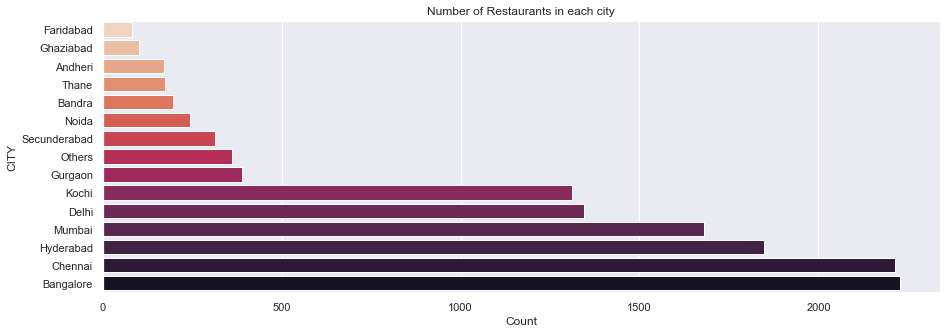

In [221]:
plt.figure(figsize=(15,5))
sns.barplot(data=train_data.groupby('CITY',as_index=False).count().sort_values('TITLE'),y='CITY',x='TITLE',palette='rocket_r')
plt.xlabel('Count')
plt.title('Number of Restaurants in each city')
plt.show()

* Here we see that the Bangalore city has the highest number of restaurants
* Top cities with higher number of restaurants are:
    - Bangalore
    - Chennai
    - Hyderabad
    - Mumbai
    - Delhi
    - Kochi

### ***Lets find out how the Ratings are distributed***

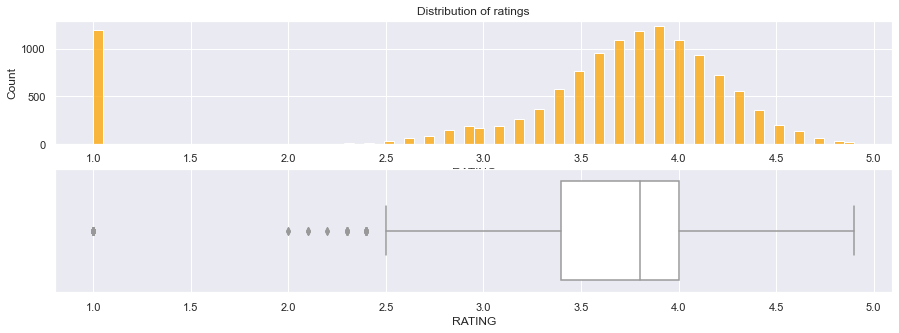

In [222]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.histplot(data=train_data,x='RATING',color='orange')
plt.title('Distribution of ratings')
plt.subplot(2,1,2)
sns.boxplot(data=train_data,x='RATING',color='white')
plt.show()

* The ratings seems to be normally distributed without considering the replaced null values (Rating 1)
* The outliers are the restaurants with very low rating.

### ***Distributiion of Restaurant votes***

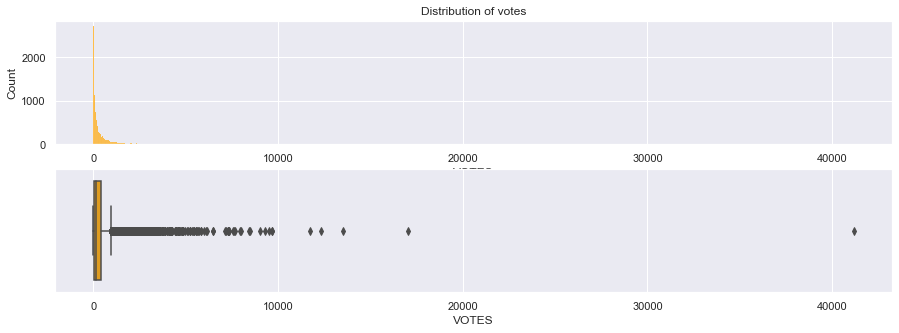

In [223]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.histplot(data=train_data,x='VOTES',color='orange')
plt.title('Distribution of votes')
plt.subplot(2,1,2)
sns.boxplot(data=train_data,x='VOTES',color='orange')
plt.show()

* Majority of the votings are in the range 0-1700
* The distribution is positively skewed
* There is an extreme outlier with more than 40000 votes

### ***Distributiion of the Food COST***

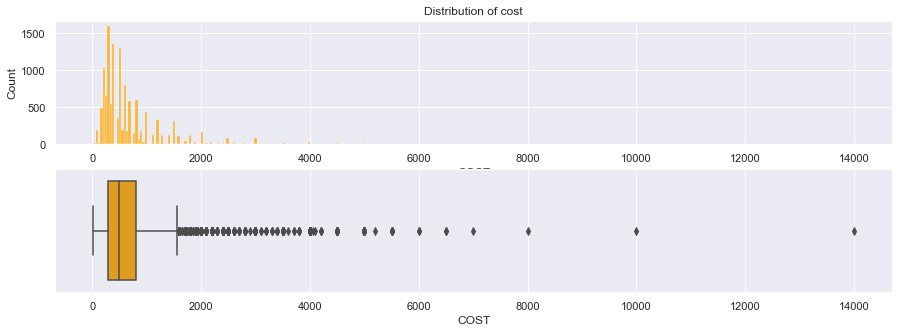

In [224]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.histplot(data=train_data,x='COST',color='orange')
plt.title('Distribution of cost')
plt.subplot(2,1,2)
sns.boxplot(data=train_data,x='COST',color='orange')
plt.show()

* Mojority of the restaurants food cost falls below 2000
* There are many restaurants serving foods at an extreme price

### ***Number of Restaurants vs Number of Days Opened***

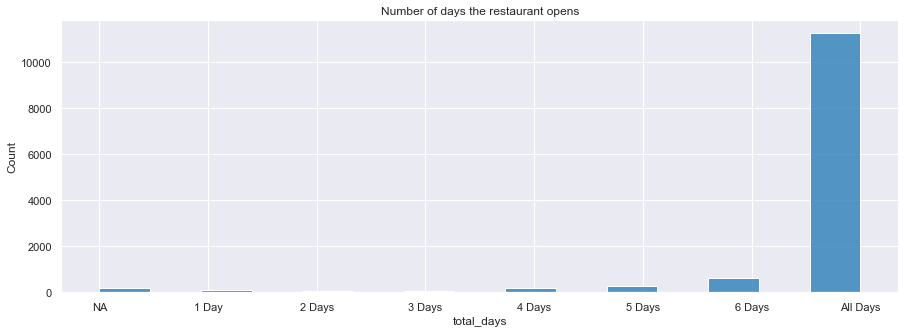

In [225]:
plt.figure(figsize=(15,5))
sns.histplot(data=train_days_open,x='total_days')
plt.title('Number of days the restaurant opens')
plt.xticks(np.arange(8),labels=['NA','1 Day','2 Days','3 Days','4 Days','5 Days','6 Days','All Days'])
plt.show()

* Almost 11000 restaurants are operating everyday
* Few restaurants didnt have any working days mentioned

### ***Number of retaurants belonging to each TITILE***

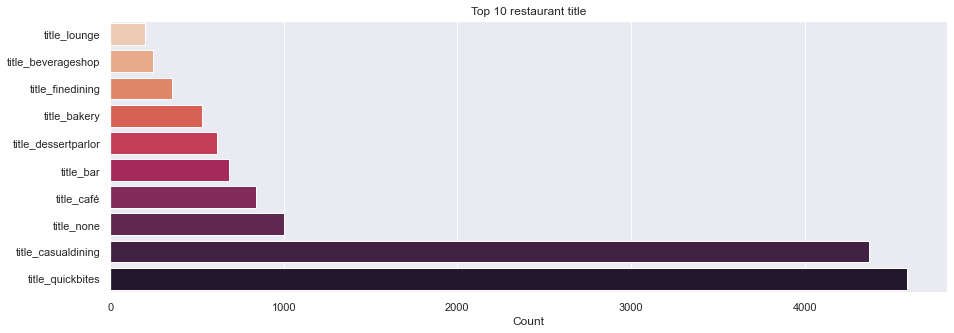

In [226]:
df = train_title.sum().sort_values().tail(10)
plt.figure(figsize=(15,5))
sns.barplot(y=df.index,x=df,palette='rocket_r')
plt.xlabel('Count')
plt.title('Top 10 restaurant title')
plt.show()

* The above bar graph shows the top 10 restaurant titles
* Majority of the restaurants are suitable for Quickbite and Casual Dining 
* There are almost 1000 of restaurants without any titles provided

### ***Variety of cuisines that the restaurant offers***

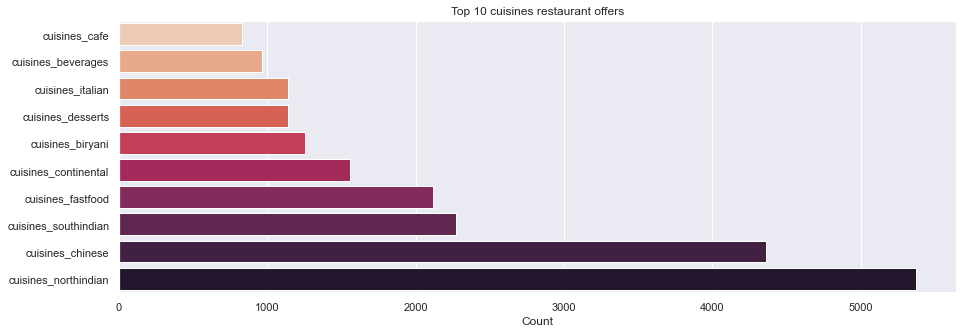

In [227]:
df = train_cuisines.sum().sort_values().tail(10)
plt.figure(figsize=(15,5))
sns.barplot(y=df.index,x=df,palette='rocket_r')
plt.xlabel('Count')
plt.title('Top 10 cuisines restaurant offers')
plt.show()

* The above graph graph shows the top 10 number of cusines available
* North Indian and Chinese are most offered cusines by the restaurants

### ***Let's find out the most expensive cuisines***

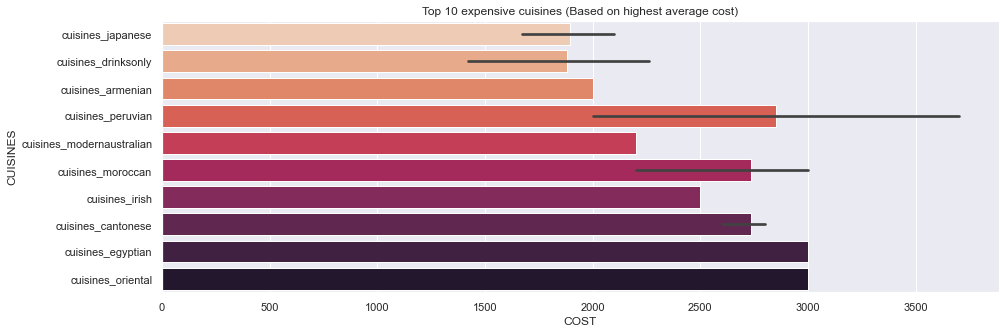

In [228]:
plt.figure(figsize=(15,5))
df = pd.concat([train_cuisines,train.COST],axis=1)
cui_cost = []
for i in df.columns[:-1]:
    df_data = pd.DataFrame([],columns=['CUISINES','COST'])
    df_data.loc[:,'COST'] = df[df[i]==1]['COST'].reset_index(drop=True)
    df_data.loc[:,'CUISINES'] = i
    cui_cost.append(df_data)
df = pd.concat(cui_cost,axis=0)
top10 = df.groupby('CUISINES',as_index=False).mean().sort_values('COST',ascending=False).CUISINES.head(10)
df = df[df['CUISINES'].isin(list(top10))].sort_values('COST')
sns.barplot(data=df, x='COST',y='CUISINES',palette='rocket_r')
plt.title('Top 10 expensive cuisines (Based on highest average cost)')
plt.show()

* The above graph shows us the top 10 cuisines having the highest average cost.
* We see that the oriental and egyptian cusines has the highest avearage cost

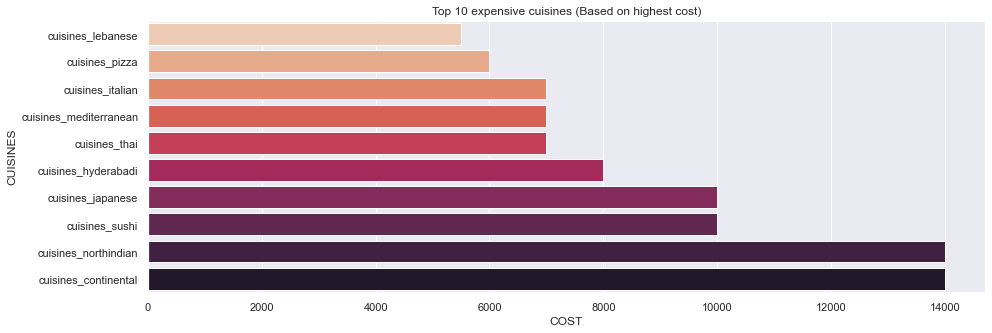

In [229]:
plt.figure(figsize=(15,5))
df = pd.concat([train_cuisines,train.COST],axis=1)
cui_cost = []
for i in df.columns[:-1]:
    df_data = pd.DataFrame([],columns=['CUISINES','COST'])
    df_data.loc[:,'COST'] = df[df[i]==1]['COST'].reset_index(drop=True)
    df_data.loc[:,'CUISINES'] = i
    cui_cost.append(df_data)
df = pd.concat(cui_cost,axis=0)
df = df.groupby('CUISINES',as_index=False)['COST'].max().sort_values('COST').tail(10)
sns.barplot(data=df, x='COST',y='CUISINES',palette='rocket_r')
plt.title('Top 10 expensive cuisines (Based on highest cost)')
plt.show()

* The above graph shows us the top 10 cuisines having the highest cost.
* We see that some of the continental and northindian cusines offers food at the highest price.

### ***Let's find out the Peak Hours at the Restaurants***

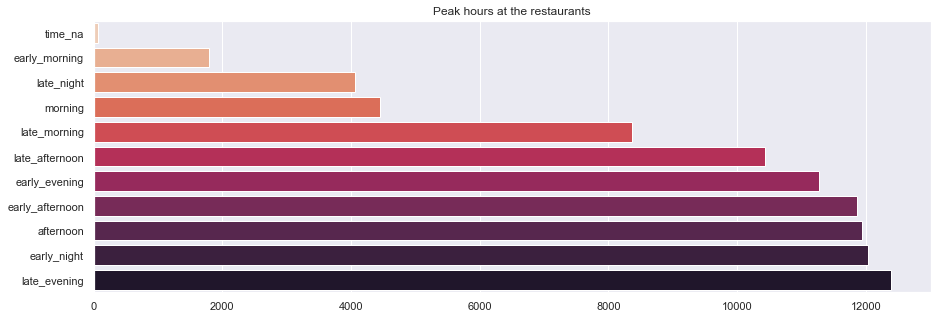

In [230]:
df = train_time.sum().sort_values()
plt.figure(figsize=(15,5))
sns.barplot(y=df.index,x=df,palette='rocket_r')
plt.title('Peak hours at the restaurants')
plt.show()

* From the above plot, we see that the number of restaurants operating are higher in the late evening (7pm - 9pm)
* Then comes in the early night (9pm - 12pm)

### ***Ratings vs City***

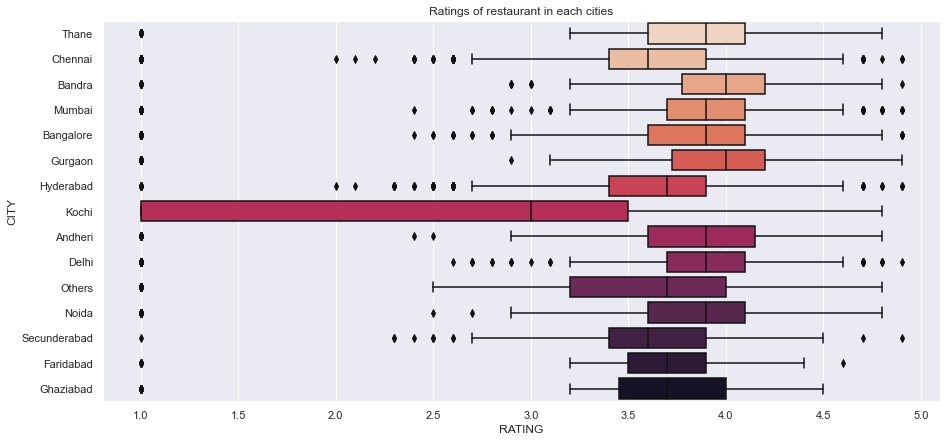

In [231]:
plt.figure(figsize=(15,7))
sns.boxplot(data=train_data,x='RATING',y='CITY',palette='rocket_r')
plt.title('Ratings of restaurant in each cities')
plt.show()

* Restaurants in Gurgaon has the highest median rating
* Kochi has the least median rating. This might be due to the replaced null values of this city. Lets find out the rating without the rating 1

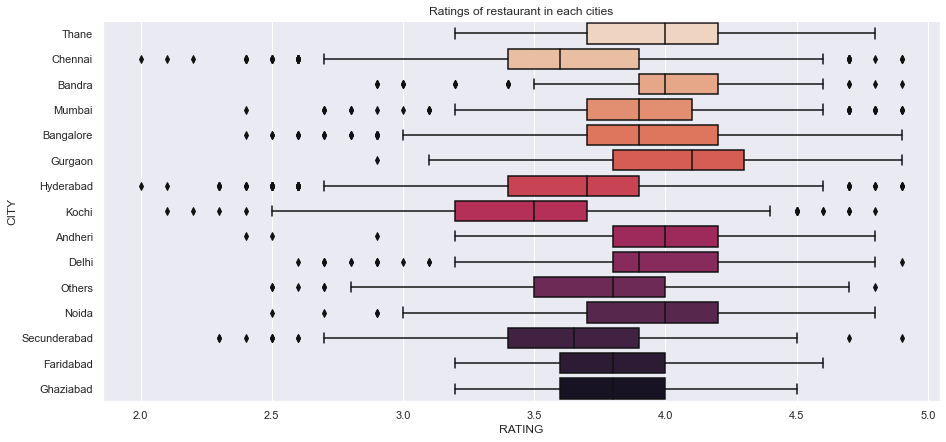

In [232]:
plt.figure(figsize=(15,7))
sns.boxplot(data=train_data[train_data.RATING > 1],x='RATING',y='CITY',palette='rocket_r')
plt.title('Ratings of restaurant in each cities')
plt.show()

* Now we see a huge difference in the boxplot. Earlier Kochi had 50% of data below 3 rating. Thats beacuse kochi has the highest number of null values in rating. Now after neglecing the replaced values we see that the median comes around 3.5 for kochi.

### ***Let's find out which cities has the most expensive restaurants***

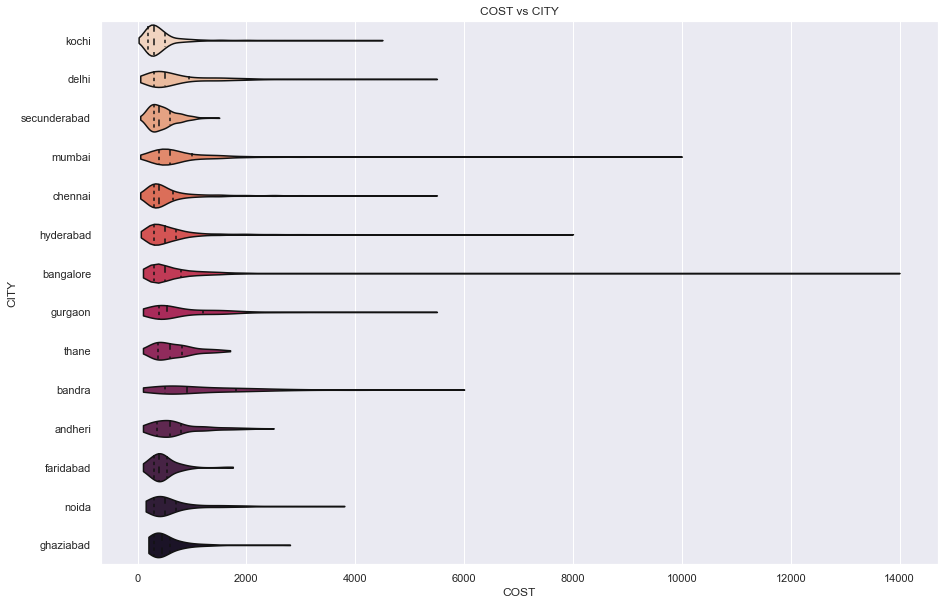

In [233]:
plt.figure(figsize=(15,10))
df = pd.concat([train_city,train.COST],axis=1)
city_cost = []
for i in df.columns[:-1]:
    df_data = pd.DataFrame([],columns=['CITY','COST'])
    df_data.loc[:,'COST'] = df[df[i]==1]['COST'].reset_index(drop=True)
    df_data.loc[:,'CITY'] = i
    city_cost.append(df_data)
df = pd.concat(city_cost,axis=0).sort_values('COST')
sns.violinplot(data=df,x='COST',y='CITY',palette='rocket_r',cut=0,inner='quartile')
plt.title('COST vs CITY')
plt.show()

* Bangalore has the highest priced restaurants, followed by mumbai and hyderabad.
* The highest median price is in bandra and also the spread is higher in bandra itself. Therfore Bandra has the most expensive restaurants.

### ***RATING vs VOTES***

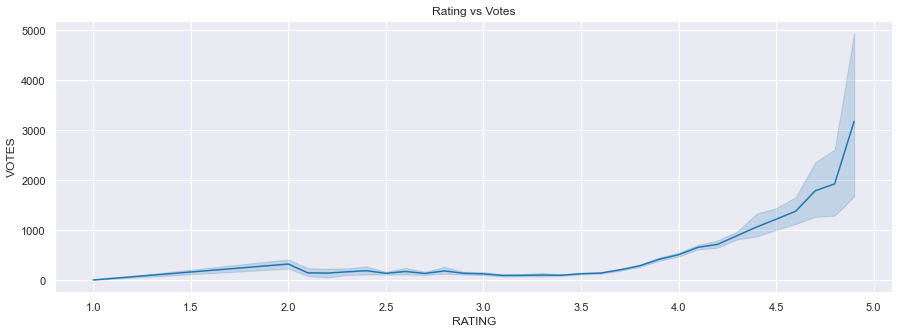

In [408]:
plt.figure(figsize=(15,5))
sns.lineplot(data=train_data,x='RATING',y='VOTES',palette='rocket_r')
plt.title('Rating vs Votes')
plt.show()

* The number of votes gradualy increases from rating 3.5

## **Feature Engineering**

In [236]:
from sklearn.preprocessing import StandardScaler
from skew_autotransform import skew_autotransform

In [237]:
# Apply box-cox transformations if absolute skewness is greater than 0.5
skew_transformed = []
for i in train.columns[:-1]:
    skew_transformed.append(skew_autotransform(train[[i]].copy(deep=True), plot = False, exp = False, threshold = 0.5))

In [238]:
# Scale data using standard scaler
scaler = StandardScaler().fit(pd.concat(skew_transformed,axis=1))
train_scaled = scaler.transform(pd.concat(skew_transformed,axis=1))
train_scaled = pd.DataFrame(train_scaled,columns=train.columns[:-1])

In [239]:
train_scaled.sample(5)

,title_casualdining,title_bar,title_quickbites,title_dessertparlor,title_café,title_microbrewery,title_beverageshop,title_iranicafe,title_bakery,title_none,...,kochi,andheri,delhi,noida,secunderabad,faridabad,ghaziabad,LOCALITY,RATING,VOTES
9741,1.377658,-0.238576,-0.753984,-0.225924,-0.266877,-0.074553,-0.141039,-0.015393,-0.209201,-0.292645,...,-0.339818,-0.116994,2.900968,-0.140456,-0.159713,-0.080729,-0.090554,1.896317,-0.186075,-0.368246
4687,-0.725870,4.191529,-0.753984,-0.225924,-0.266877,-0.074553,-0.141039,-0.015393,-0.209201,-0.292645,...,-0.339818,-0.116994,-0.344713,-0.140456,-0.159713,-0.080729,-0.090554,0.744012,1.989065,2.682236
8430,-0.725870,-0.238576,1.326289,-0.225924,-0.266877,-0.074553,-0.141039,-0.015393,-0.209201,-0.292645,...,-0.339818,-0.116994,-0.344713,-0.140456,-0.159713,-0.080729,-0.090554,0.301609,0.558402,-0.368246
1757,1.377658,-0.238576,-0.753984,-0.225924,-0.266877,-0.074553,-0.141039,-0.015393,-0.209201,-0.292645,...,-0.339818,-0.116994,-0.344713,-0.140456,-0.159713,-0.080729,-0.090554,1.487352,0.357484,0.288342
7165,-0.725870,-0.238576,1.326289,-0.225924,-0.266877,-0.074553,-0.141039,-0.015393,-0.209201,-0.292645,...,2.942754,-0.116994,-0.344713,-0.140456,-0.159713,-0.080729,-0.090554,-0.081635,-0.186075,-0.750665


In [388]:
# Apply box-cox transformations if absolute skewness is greater than 0.5 on test data
skew_transformed_test = []
for i in test.columns:
    skew_transformed_test.append(skew_autotransform(test[[i]].copy(deep=True), plot = False, exp = False, threshold = 0.5))

In [389]:
# Scale data using standard scaler
test_scaled = scaler.transform(pd.concat(skew_transformed_test,axis=1))
test_scaled = pd.DataFrame(test_scaled,columns=test.columns)

In [390]:
test_scaled.sample(5)

,title_casualdining,title_quickbites,title_none,title_foodtruck,title_dessertparlor,title_bar,title_lounge,title_beverageshop,title_pub,title_café,...,kochi,andheri,delhi,noida,secunderabad,faridabad,ghaziabad,LOCALITY,RATING,VOTES
1829,-0.611745,4.191529,-141653.848673,-1.174187e+146,-13495.385563,13.413213,-1.209304e+08,64.964093,-5.816669e+25,-12.338846,...,1.478931,8.547238,-0.685918,-3320.73303,-8107.499615,12.38703,-6.436357e+08,-0.729806,-0.684193,-1.183173
636,1.377658,4.191527,-141653.848673,-1.174187e+146,-13495.385563,13.413213,-1.209304e+08,64.964093,-5.816669e+25,-12.338846,...,1.478931,8.547238,-0.685918,-3320.73303,-8107.499615,12.38703,-6.436357e+08,-1.313675,0.476414,0.763824
3291,-0.611745,4.191529,-141653.848673,-1.174187e+146,-13495.385563,13.413213,-1.209304e+08,64.964093,-5.816669e+25,-12.338846,...,1.478931,8.547238,-0.685918,-3320.73303,-8107.499615,12.38703,-6.436357e+08,0.203869,-1.360384,-0.525188
2552,-0.611745,4.191527,-141653.848673,-1.174187e+146,-13495.385563,13.413213,-1.209304e+08,64.964093,-5.816669e+25,-12.338846,...,1.478931,8.547238,-0.685918,-3320.73303,-8107.499615,12.38703,-6.436357e+08,0.257884,0.892221,0.011105
3641,1.377658,4.191527,-141653.848673,-1.174187e+146,-13495.385563,13.413213,-1.209304e+08,64.964093,-5.816669e+25,-12.338846,...,1.478931,8.547238,-0.685918,-3320.73303,-8107.499615,12.38703,-6.436357e+08,0.301609,-1.055483,0.598783


## **Model Training and Evaluation**

In [277]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [241]:
X = train_scaled
y = train.COST

In [242]:
print(X.shape)
print(y.shape)

(12664, 191)
(12664,)


In [246]:
# Find out best random_state
random_state = []
for i in range(1,101):
    if i%10 == 0:
      print('-->',i,end=' ')
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    pred = Lasso().fit(x_train,y_train).predict(x_test)
    random_state.append(mean_squared_error(y_test,pred))
print('Best random state : ',random_state.index(min(random_state))+1,min(random_state))

--> 10 --> 20 --> 30 --> 40 --> 50 --> 60 --> 70 --> 80 --> 90 --> 100 Best random state :  37 74865.70967771218


In [283]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=37)

### ***Feature selection before training the model***

In [290]:
from sklearn.feature_selection import SelectFromModel

In [288]:
# Lets find out the feature importance using the XGBoost regressor
model = XGBRegressor()
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

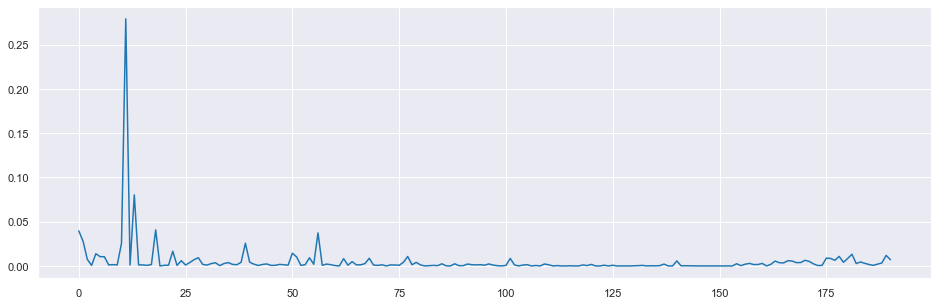

In [289]:
# Plot the feature importances
importance = dict(enumerate(model.feature_importances_))
plt.figure(figsize=(16,5))
sns.lineplot(x=np.arange(len(importance)),y=list(importance.values()))
plt.show()

In [292]:
# Iterate to find out the best number of max_features
scores = []
for i in range(1,101):
    fs = SelectFromModel(XGBRegressor(), max_features=i)
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    model = XGBRegressor().fit(x_train_fs,y_train)
    pred = model.predict(x_test_fs)
    scores.append(r2_score(pred,y_test))
    print(i,end='.')

1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.

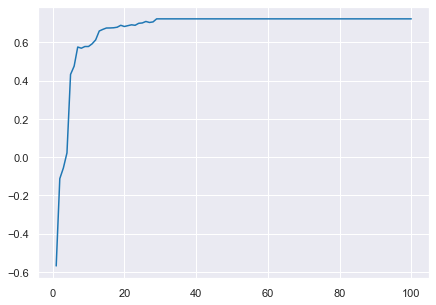

In [299]:
# Plot R2Score vs the max_features
plt.figure(figsize=(7,5))
sns.lineplot(x=np.arange(1,101),y=scores)
plt.show()

In [300]:
scores.index(max(scores))

28

* So we require atleast 29 features to achieve best performances

In [324]:
# Tranform features with 29 max features
fs = SelectFromModel(XGBRegressor(), max_features=29)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [391]:
test_fs = fs.transform(test_scaled)

In [392]:
print(x_train_fs.shape)
print(x_test_fs.shape)
print(test_fs.shape)

(10131, 29)
(2533, 29)
(4230, 29)


### ***Model training***

In [305]:
# Create dictionary of models to be trained
model_dict = {
    'RDR':Ridge(),
    'LSR':Lasso(),
    'DTR':DecisionTreeRegressor(),
    'GBR':GradientBoostingRegressor(),
    'LBR':LGBMRegressor(),
    'CBR':CatBoostRegressor(verbose=0),
    'SVR':SVR(),
    'RFR':RandomForestRegressor(),
    'ETR':ExtraTreesRegressor()
}

In [306]:
# Lets use Root Mean Squared Log error for the evaluation of the models
def rmsle_score(pred,y):
    pred = np.log(pred)
    y = np.log(y)
    return 1-((np.sum((pred-y)**2))/len(y))**1/2
scorer = make_scorer(rmsle_score,greater_is_better=True)

In [307]:
cv_score = {}
for i in model_dict:
    print(i)
    kfold = KFold(n_splits=10,random_state=37)
    cv_results = cross_validate(model_dict[i], x_train_fs, y_train, scoring=scorer, cv=kfold,return_train_score=True)
    cv_score[i] = cv_results['test_score']
    print(round(np.mean(cv_results['test_score']),2),'+/-',round(np.std(cv_results['test_score'])*2,2))

RDR
0.9 +/- 0.01
LSR
0.9 +/- 0.01
DTR
0.85 +/- 0.02
GBR
0.91 +/- 0.01
LBR
0.92 +/- 0.01
CBR
0.92 +/- 0.01
SVR
0.86 +/- 0.02
RFR
0.91 +/- 0.01
ETR
0.89 +/- 0.01


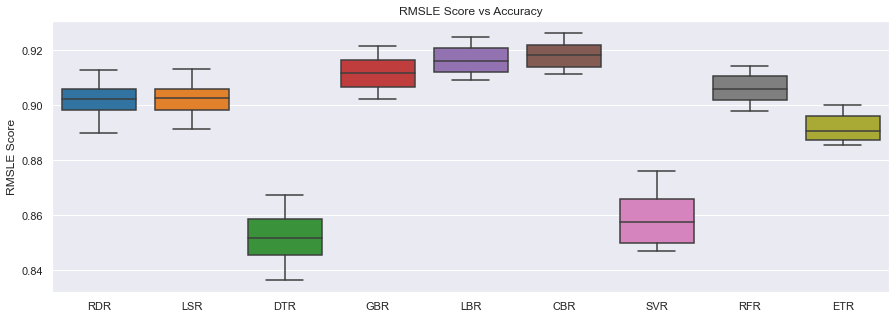

In [407]:
df = pd.DataFrame(cv_score)
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.title('RMSLE Score vs Accuracy')
plt.ylabel('RMSLE Score')
plt.show()

* Best performing models with median score greater than 0.90 are:
    - CatBoostRegressor
    - LightGBM regressor
    - GBR regressor
    - Random forest
    - Lasso
    - Ridge

### ***Let's apply Hyperparameter tuning to improve the model predicition***

In [317]:
# Tune parameter of Ridge regressor
params = {
    'alpha':[0.0001,0.0002],
    'solver':['auto', 'svd']
    }

kfold = KFold(n_splits=10, random_state=37)
ridge_grid = GridSearchCV(Ridge(), param_grid=params, scoring=scorer, cv=kfold,verbose=1)
ridge_grid.fit(x_train_fs,y_train)
print('Best: %f using %s' % (ridge_grid.best_score_, ridge_grid.best_params_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.902052 using {'alpha': 0.0001, 'solver': 'auto'}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished


In [318]:
# Ridge regressor prediction
y_pred = ridge_grid.best_estimator_.predict(x_train_fs)
print('RMSE loss in train :',round(np.sqrt(mean_squared_error(y_train,y_pred)),3))
y_pred = ridge_grid.best_estimator_.predict(x_test_fs)
print('RMSE in testing :',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print('R2 Score :',round(r2_score(y_test,y_pred),3))
print('RMSLE Score :',round(rmsle_score(y_pred,y_test),3))

RMSE loss in train : 358.944
RMSE in testing : 283.514
R2 Score : 0.733
RMSLE Score : 0.904


In [319]:
# Tune parameter of Lasso regressor
params = {
    'alpha':[0.0001,0.0002,0.0003,0.0004,0.0005],
    }

kfold = KFold(n_splits=10, random_state=37)
lasso_grid = GridSearchCV(Lasso(), param_grid=params, scoring=scorer, cv=kfold,verbose=1)
lasso_grid.fit(x_train_fs,y_train)
print('Best: %f using %s' % (lasso_grid.best_score_, lasso_grid.best_params_))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.902052 using {'alpha': 0.0005}


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


In [320]:
# Lasso regressor prediction
y_pred = lasso_grid.best_estimator_.predict(x_train_fs)
print('RMSE in train :',round(np.sqrt(mean_squared_error(y_train,y_pred)),3))
y_pred = lasso_grid.best_estimator_.predict(x_test_fs)
print('RMSE in testing :',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print('R2 Score :',round(r2_score(y_test,y_pred),3))
print('RMSLE Score :',round(rmsle_score(y_pred,y_test),3))

RMSE in train : 358.944
RMSE in testing : 283.514
R2 Score : 0.733
RMSLE Score : 0.904


In [380]:
# Tune parameter of LGBM regressor
params = {
    'n_estimators':[95,100,105],
      'num_leaves': [44],
      'max_depth': [9,10],
      'min_split_gain': [0.001,0.0001],
      'min_child_weight': [30]
    }

kfold = KFold(n_splits=10, random_state=37)
lgbm_grid = GridSearchCV(LGBMRegressor(), param_grid=params, scoring=scorer, cv=kfold,verbose=1)
lgbm_grid.fit(x_train_fs,y_train)
print('Best: %f using %s' % (lgbm_grid.best_score_, lgbm_grid.best_params_))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   27.9s finished


Best: 0.915291 using {'max_depth': 9, 'min_child_weight': 30, 'min_split_gain': 0.001, 'n_estimators': 105, 'num_leaves': 44}


In [381]:
# LGBM regressor prediction
y_pred = lgbm_grid.best_estimator_.predict(x_train_fs)
print('RMSE in train :',round(np.sqrt(mean_squared_error(y_train,y_pred)),3))
y_pred = lgbm_grid.best_estimator_.predict(x_test_fs)
print('RMSE in testing :',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print('R2 Score :',round(r2_score(y_test,y_pred),3))
print('RMSLE Score :',round(rmsle_score(y_pred,y_test),3))

RMSE in train : 296.282
RMSE in testing : 273.47
R2 Score : 0.751
RMSLE Score : 0.917


In [333]:
# Tune parameter of CatBoost regressor
params = {
    "iterations":[100,200],
    "learning_rate": [0.01,0.05],
    "eval_metric": ["R2"],
    }

kfold = KFold(n_splits=10, random_state=37)
cat_grid = GridSearchCV(CatBoostRegressor(verbose=0), param_grid=params, scoring=scorer, cv=kfold,verbose=1)
cat_grid.fit(x_train_fs,y_train)
print('Best: %f using %s' % (cat_grid.best_score_, cat_grid.best_params_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   55.0s finished


Best: 0.913451 using {'eval_metric': 'R2', 'iterations': 200, 'learning_rate': 0.05}


In [334]:
# CatBoost regressor prediction
y_pred = cat_grid.best_estimator_.predict(x_train_fs)
print('RMSE in train :',round(np.sqrt(mean_squared_error(y_train,y_pred)),3))
y_pred = cat_grid.best_estimator_.predict(x_test_fs)
print('RMSE in testing :',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print('R2 Score :',round(r2_score(y_test,y_pred),3))
print('RMSLE Score :',round(rmsle_score(y_pred,y_test),3))

RMSE in train : 307.105
RMSE in testing : 266.344
R2 Score : 0.764
RMSLE Score : 0.915


In [335]:
# Tune parameter of GBR regressor
params = {
    "n_estimators":[95,100,105],
    "learning_rate": [0.01,0.05,0.1],
    }

kfold = KFold(n_splits=10, random_state=37)
gbr_grid = GridSearchCV(GradientBoostingRegressor(), param_grid=params, scoring=scorer, cv=kfold,verbose=1)
gbr_grid.fit(x_train_fs,y_train)
print('Best: %f using %s' % (gbr_grid.best_score_, gbr_grid.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.0min finished


Best: 0.912196 using {'learning_rate': 0.1, 'n_estimators': 105}


In [336]:
# GBR regressor prediction
y_pred = gbr_grid.best_estimator_.predict(x_train_fs)
print('RMSE in train :',round(np.sqrt(mean_squared_error(y_train,y_pred)),3))
y_pred = gbr_grid.best_estimator_.predict(x_test_fs)
print('RMSE in testing :',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print('R2 Score :',round(r2_score(y_test,y_pred),3))
print('RMSLE Score :',round(rmsle_score(y_pred,y_test),3))

RMSE in train : 318.754
RMSE in testing : 270.47
R2 Score : 0.757
RMSLE Score : 0.913


In [378]:
# Tune parameter of Randomforest regressor
params = {
    'n_estimators':[100,500],
    'max_depth':[20,30],
    'min_samples_split':[10,15],
    'min_samples_leaf':[2,5]
    }

kfold = KFold(n_splits=10, random_state=37)
rfr_grid = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring=scorer, cv=kfold,verbose=1)
rfr_grid.fit(x_train_fs,y_train)
print('Best: %f using %s' % (rfr_grid.best_score_, rfr_grid.best_params_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 30.9min finished


Best: 0.916299 using {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 500}


In [379]:
# Randomforest regressor prediction
y_pred = rfr_grid.best_estimator_.predict(x_train_fs)
print('RMSE in train :',round(np.sqrt(mean_squared_error(y_train,y_pred)),3))
y_pred = rfr_grid.best_estimator_.predict(x_test_fs)
print('RMSE in testing :',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print('R2 Score :',round(r2_score(y_test,y_pred),3))
print('RMSLE Score :',round(rmsle_score(y_pred,y_test),3))

RMSE in train : 277.388
RMSE in testing : 276.986
R2 Score : 0.745
RMSLE Score : 0.918


* Based on the RMSLE score, the best performing models are:
    - Random Forest Regressor : 0.918
    - LGBM Regressor : 0.917
* Though Random Forest regressor has achieved the best score, the inference time for this model is higher than rest of the model.

### ***Saving the models***

In [409]:
import joblib
joblib.dump(rfr_grid.best_estimator_,'Restaurant_price_prediction_random_forest_regressor.pkl')
joblib.dump(lgbm_grid.best_estimator_,'Restaurant_price_prediction_lgmb_regressor.pkl')

['Restaurant_price_prediction_lgmb_regressor.pkl']

* The above predictions are obtained by training with the most important features. Now lets try using the entire features to check if it predicitons results in much higher RMSLE score. Lets use LGMB regressor for training as it is much faster than Random Forest.

### ***Lets use the entire features to train LGBM Regressor***

In [382]:
# Tune parameter of LGBM regressor
params = {
    'n_estimators':[95,100,105],
      'num_leaves': [44],
      'max_depth': [9,10],
      'min_split_gain': [0.001],
      'min_child_weight': [30]
    }

kfold = KFold(n_splits=10, random_state=37)
lgbm_grid_2 = GridSearchCV(LGBMRegressor(), param_grid=params, scoring=scorer, cv=kfold,verbose=1)
lgbm_grid_2.fit(x_train,y_train)
print('Best: %f using %s' % (lgbm_grid_2.best_score_, lgbm_grid_2.best_params_))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   34.4s finished


Best: 0.928548 using {'max_depth': 10, 'min_child_weight': 30, 'min_split_gain': 0.001, 'n_estimators': 100, 'num_leaves': 44}


In [383]:
# LGBM regressor prediction
y_pred = lgbm_grid_2.best_estimator_.predict(x_train)
print('RMSE in train :',round(np.sqrt(mean_squared_error(y_train,y_pred)),3))
y_pred = lgbm_grid_2.best_estimator_.predict(x_test)
print('RMSE in testing :',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print('R2 Score :',round(r2_score(y_test,y_pred),3))
print('RMSLE Score :',round(rmsle_score(y_pred,y_test),3))

RMSE in train : 256.947
RMSE in testing : 262.989
R2 Score : 0.77
RMSLE Score : 0.93


In [410]:
# Save model
joblib.dump(lgbm_grid_2.best_estimator_,'Restaurant_price_prediction_lgbm_regressor_full_feature.pkl')

['Restaurant_price_prediction_lgbm_regressor_full_feature.pkl']

## **Test Data Prediction**

In [396]:
predictions = lgbm_grid.best_estimator_.predict(test_fs)

In [397]:
predictions

array([1506.52352989, 2098.34260614, 1329.08650793, ..., 1943.31519387,
       1888.08686593, 2593.03110745])

In [402]:
df = pd.DataFrame(predictions,columns=['Predictions'])

In [403]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Predictions,4230.0,1727.287014,253.198382,1197.418546,1550.432911,1691.835312,1888.086866,3574.514084


In [404]:
df.to_csv('Restaurant_cost_test_data_predicitons.csv')

## **Conclusion**